In [59]:
import nibabel as nib
import matplotlib.pyplot as plt 
from matplotlib import patches
import numpy as np
import re
import os
import cv2

In [3]:
def load_nifti_image(file_path):
    img = nib.load(file_path)
    img_data = img.get_fdata()
    return img_data

Site 1

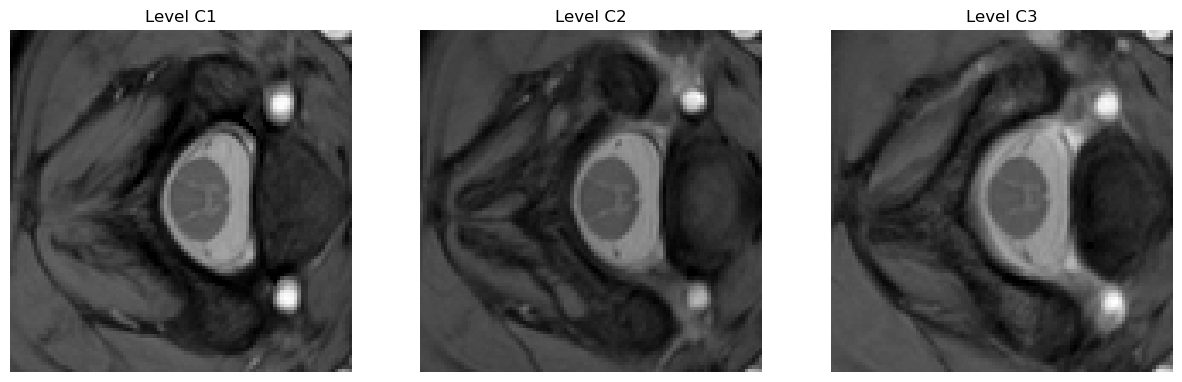

In [4]:
img_test = load_nifti_image('./train/site1-sc01-image.nii.gz')
plt.figure(figsize=(15,6))
for k in range(3):
    plt.subplot(1,3,k+1)
    plt.imshow(img_test[:,:,k], cmap='gray')
    plt.axis('off')
    plt.title(f'Level C{k+1}')

Site 2

In [5]:
img_test = load_nifti_image('./train/site2-sc01-image.nii.gz')

In [6]:
img_test.shape

(320, 320, 7)

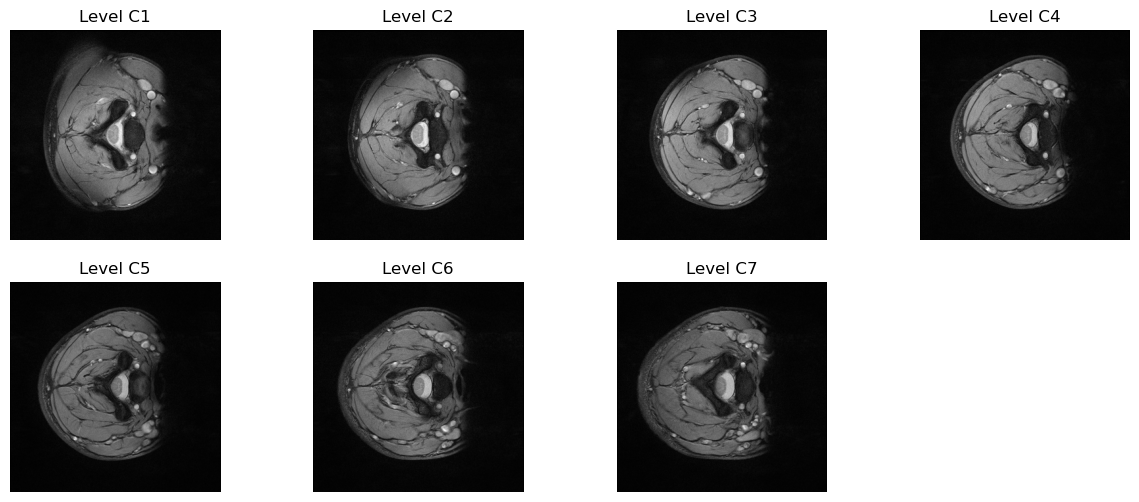

In [7]:
plt.figure(figsize=(15,6))
for k in range(7):
    plt.subplot(2,4,k+1)
    plt.imshow(img_test[:,:,k], cmap='gray')
    plt.axis('off')
    plt.title(f'Level C{k+1}')

Site 3

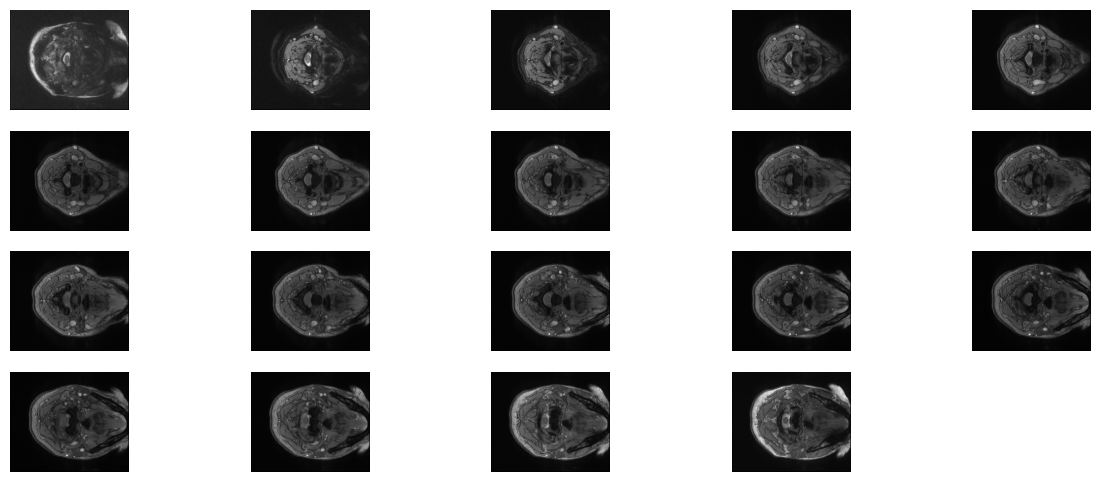

In [8]:
img_test = load_nifti_image('./train/site3-sc01-image.nii.gz')
img_test.shape
plt.figure(figsize=(15,6))
for k in range(4,23):
    plt.subplot(4,5,k-3)
    plt.imshow(img_test[:,:,k], cmap='gray')
    plt.axis('off')

Site 4

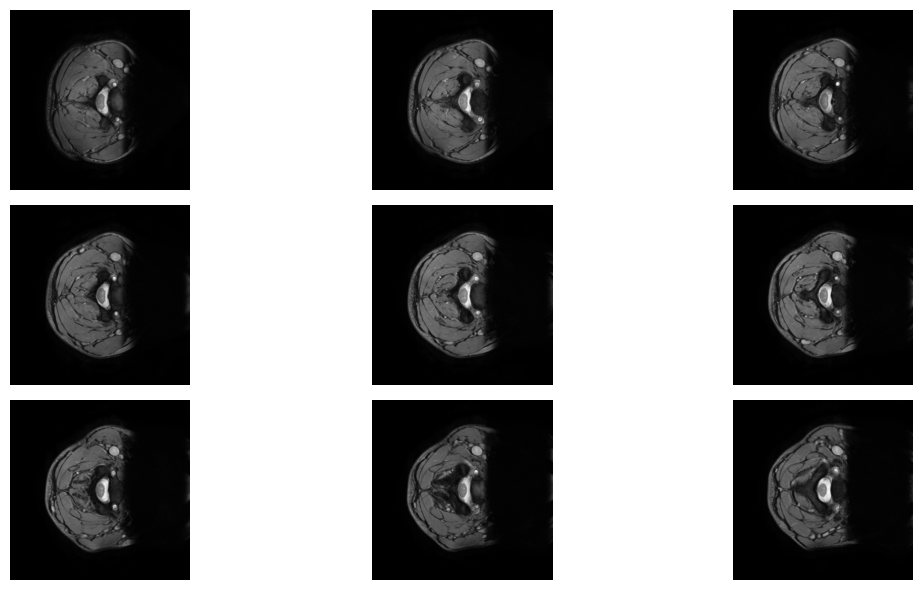

In [9]:
img_test = load_nifti_image('./train/site4-sc02-image.nii.gz')
img_test.shape
plt.figure(figsize=(15,6))
for k in range(3,12):
    plt.subplot(3,3,k-2)
    plt.imshow(img_test[:,:,k], cmap='gray')
    plt.axis('off')
    plt.tight_layout()

In [ ]:
def crop_image_around_the_mask(im

In [10]:
dict_dataset = {}

In [11]:
with open('./train/site1-sc01-levels.txt', 'r') as file:
    lines = file.readlines()

In [12]:
def get_levels(filename):
    list_levels = []
    with open(filename, 'r') as file:
        lines = file.readlines()
    for line in lines[1:]:
        try:
            levels_in_file = re.findall('(,)(.*)', line)[0][1]
            list_levels.append(int(levels_in_file.strip()[0]))
        except:
            list_levels.append(None)
    return list_levels

In [13]:
list_lvl = get_levels('./train/site4-sc01-levels.txt')

In [14]:
list_lvl

[None, None, None, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5]

In [66]:
dict_filepaths={}
filename_img = []
filename_levels = []
filename_masks = []
for site_index in range(1,5):
    for irm_index in range(1,11):
        if irm_index < 10:
            name_index = '0' + str(irm_index)
        else:
            name_index = '10'
        filename_img.append('site'+str(site_index)+'-sc'+name_index+'-image.nii.gz')
        filename_levels.append('site'+str(site_index)+'-sc'+name_index+'-levels.txt')
        filename_masks.append(['site'+str(site_index)+'-sc'+name_index+'-mask-r'+str(i)+'.nii.gz' for i in range(1,5)])

In [17]:
for k in range(len(filename_img)):
    dict_filepaths['IRM'+str(k)]={
            'site' : int(filename_img[k][4:5]),
            'filename_img' : filename_img[k],
            'filename_levels' : filename_levels[k],
            'filename_masks' : filename_masks[k]
    }

In [18]:
dict_filepaths['IRM0']

{'site': 1,
 'filename_img': 'site1-sc01-image.nii.gz',
 'filename_levels': 'site1-sc01-levels.txt',
 'filename_masks': ['site1-sc01-mask-r1.nii.gz',
  'site1-sc01-mask-r2.nii.gz',
  'site1-sc01-mask-r3.nii.gz',
  'site1-sc01-mask-r4.nii.gz']}

In [19]:
mask_test = load_nifti_image('./train/site2-sc01-mask-r2.nii.gz')

In [20]:
mask_test.shape

(320, 320, 7)

In [116]:
def convert_mask_into_gray_matter(mask):
    segmented_mask = np.zeros(mask.shape)
    for x in range(mask.shape[0]):
        for y in range(mask.shape[1]):
            if mask[x,y] == 1:
                segmented_mask[x,y] = 1
            else:
                pass 
    indices = np.argwhere(mask == 1)
    xmin = np.min(indices[:,1])
    xmax = np.max(indices[:,1])
    ymin = np.max(indices[:,0])
    ymax = np.min(indices[:,0])
    return segmented_mask, (xmin, xmax-xmin, ymax, ymin-ymax)

In [117]:
mask, (x,w,y,h) = convert_mask_into_gray_matter(mask_test[:,:,0])
mask.shape
(x,w,y,h)

(150, 11, 150, 17)

xmin = 1, 

xmax = 7, 

ymin = 8, 

ymax = 2, 



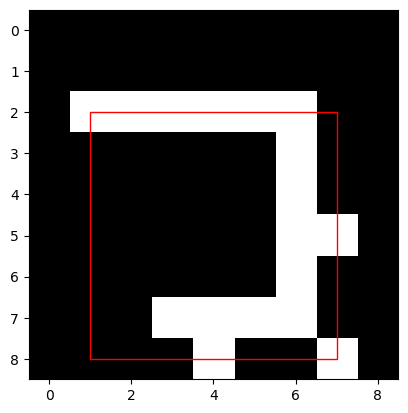

In [115]:
mask = np.array([
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,1,1,1,1,0,0],
    [0,0,0,0,1,0,0,1,0]])

indices = np.argwhere(mask == 1)
xmin = np.min(indices[:,1])
xmax = np.max(indices[:,1])
ymin = np.max(indices[:,0])
ymax = np.min(indices[:,0])
print(f'''xmin = {xmin}, \n
xmax = {xmax}, \n
ymin = {ymin}, \n
ymax = {ymax}, \n''')
w = xmax-xmin
h = ymin-ymax

fig, ax = plt.subplots()
ax.imshow(mask, cmap='gray')

rect = patches.Rectangle((xmin, ymax),
                         w,
                         h,
                         linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

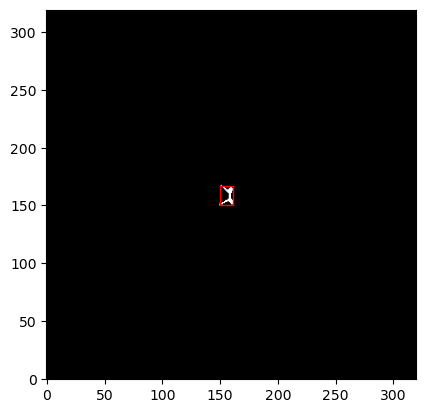

In [124]:
fig, ax = plt.subplots()
ax.imshow(mask, cmap='gray')

rect = patches.Rectangle((x, y),
                         w,
                         h,
                         linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.gca().invert_yaxis()
plt.show()


In [60]:
def display_image_and_its_mask(img, mask):
    img_normalized = np.copy(img) / np.max(img)
    img_with_mask = np.copy(img_normalized)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if mask[x,y]==1:
                img_with_mask[x,y]=1
            else:
                pass
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.imshow(img_normalized, cmap='gray')
    plt.axis('off')
    plt.title('Base image')

    plt.subplot(1,2,2)
    plt.imshow(img_with_mask, cmap='gray')
    plt.axis('off')
    plt.title('Image with mask')

In [61]:
display_image_and_its_mask(img_test[:,:,0], mask)

IndexError: index 320 is out of bounds for axis 1 with size 320

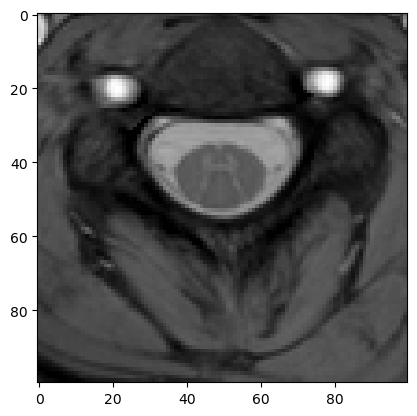

In [87]:
plt.imshow(np.rot90(img_test[:,:,0]), cmap='gray')